In [1]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sysquant.estimators.diversification_multipliers import diversification_mult_single_period
from sysquant.optimisation.weights import portfolioWeights
from syslogdiag.log_to_screen import logtoscreen
from syscore.fileutils import get_filename_for_package

log = logtoscreen('csvFuturesSimData')
log.set_logging_level('close eye')
# data = csvFuturesSimData()
data =  csvFuturesSimData(csv_data_paths=dict(
            csvFuturesAdjustedPricesData='ctse.data.adjusted_prices_csv',
            csvFuturesMultiplePricesData='ctse.data.multiple_prices_csv',
            csvFuturesInstrumentData='ctse.data.csvconfig'
    ), log=log)
golbal_system = simplesystem(csvFuturesSimData(), 'paper.systems.china.yaml')
system = simplesystem(
    data,
    'paper.systems.china.yaml')

2022-11-28 15:43:44 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-28 15:43:44 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-28 15:43:44 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-28 15:43:44 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-28 15:43:44 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-28 15:43:44 {'type': 'base_system', 'stage': 'config'}  Adding config defaults


AL
2022-11-28 15:49:14 {'type': 'base_system', 'stage': 'rules', 'instrument_code': 'AL', 'rule_variation_name': 'ewmac4'}  Calculating raw forecast AL for ewmac4
22


<AxesSubplot:xlabel='multiplier', ylabel='score'>

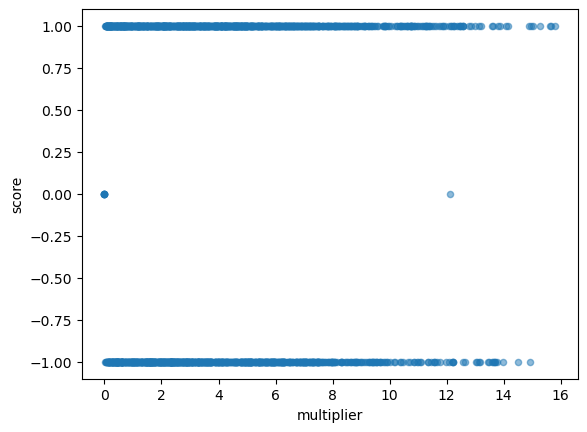

In [22]:
import random

ins_se = pd.Series(system.get_instrument_list())
ins = ins_se.sample(1).values[0]
print(ins)
price = system.data.daily_prices(ins).dropna().rename(ins)
position = system.rules.get_raw_forecast(ins, 'ewmac4').dropna().rename('position')

lookahead_li = list(range(2, 100))
lookahead = lookahead_li[random.randint(0, len(lookahead_li) - 1)]
print(lookahead)
_std = price.diff().rolling(lookahead).std().rename('std({})'.format(ins))
_mov = price.rolling(lookahead).apply(lambda se: se[-1] - se[0]).rename('mov({})'.format(ins))
# _std.tail(200).plot(legend=True)
# _mov.tail(200).plot(legend=True, secondary_y=True)
multi = (_mov/_std).rename('multiplier')
multi = multi.shift(-lookahead)

df = pd.concat([position, multi], axis=1).dropna()
df.loc[:, 'future_direction'] = np.sign(df.multiplier)
df.loc[:, 'multiplier'] = np.abs(df.multiplier)
df.loc[:, 'score'] = df.position * df.future_direction
df.plot.scatter(x='multiplier', y='score', alpha=0.5)